# GIS with Python！！！
## Notebook "About GIS" part and "Handling GIS Data With file" part
- Chomoku LLC: Hideyuki Ogawa
- My twitter([@ogawahideyuki](https://twitter.com/ogawahideyuki))
- Company twitter [@hijichomoku](https://twitter.com/hijichomoku)
- https://chomoku.com/


In [33]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal &> /dev/null
# Install rtree - Geopandas requirment
!apt install python3-rtree &> /dev/null
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git &> /dev/null
# Install descartes - Geopandas requirment
!pip install descartes &> /dev/null
!pip install plotly -U &> /dev/null
!pip install rasterio &> /dev/null

In [34]:
import geopandas as gpd
import folium
import shapely
import xarray as xr

In [4]:
# read my recent activity data
df = gpd.read_file('/content/drive/MyDrive/pyconjp2021/data/my_activity.geojson')
df

,地名,geometry
0,銀閣寺,POINT (135.79821 35.02702)
1,金閣寺,POINT (135.72924 35.03937)
2,MKボウル,POINT (135.74609 35.06682)
3,京都駅,POINT (135.75877 34.98585)


In [13]:
# check CRS
# I wonder this is wrong ? what is api's crs? Check google geocoding api's document.
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
df.geometry.values

<GeometryArray>
Length: 4, dtype: geometry

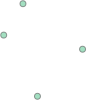

In [20]:
# Express my activity with MultiPoint
multi_point = shapely.geometry.MultiPoint(df.geometry.values)
multi_point

In [21]:
# express with folium
center = multi_point.centroid
map = folium.Map([center.y, center.x])
folium.GeoJson(multi_point).add_to(map)
map

In [15]:
# Express With LineString(east and west, north and south)
eastwest = shapely.geometry.LineString([df.loc[0, 'geometry'], df.loc[1, 'geometry']])
southnorth = shapely.geometry.LineString([df.loc[2, 'geometry'], df.loc[3, 'geometry']])

In [16]:
print(eastwest)
print(southnorth)

LINESTRING (135.7982058 35.0270213, 135.7292431 35.03937)
LINESTRING (135.746086 35.0668248, 135.7587667 34.985849)


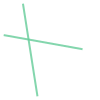

In [18]:
multiline = shapely.geometry.MultiLineString([eastwest, southnorth])
multiline

In [19]:
# with folium

center = multiline.centroid
map = folium.Map([center.y, center.x])
folium.GeoJson(multiline).add_to(map)
map

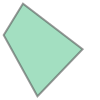

In [23]:
# Express With Polygon(ALL)

polygon = shapely.geometry.Polygon([
                                    df.loc[0, 'geometry'],
                                    df.loc[2, 'geometry'],
                                    df.loc[1, 'geometry'],
                                    df.loc[3, 'geometry']
])
polygon

In [24]:
print(polygon)

POLYGON ((135.7982058 35.0270213, 135.746086 35.0668248, 135.7292431 35.03937, 135.7587667 34.985849, 135.7982058 35.0270213))


In [25]:
# with folium

center = polygon.centroid
map = folium.Map([center.y, center.x])
folium.GeoJson(polygon).add_to(map)
map

In [29]:
# Change CRS and Mesure the Distance
# Mesure KinkakuJI - GinkakuJI(west-east) / Kyoto_statio / MK BOWL

df_kyoto = df.to_crs('EPSG:6674')
print(df_kyoto)
print('----------')
df_kyoto.crs

      地名                        geometry
0    銀閣寺  POINT (-18413.537 -107922.597)
1    金閣寺  POINT (-24702.618 -106537.855)
2  MKボウル  POINT (-23158.194 -103496.311)
3    京都駅  POINT (-22023.357 -112481.852)
----------


<Projected CRS: EPSG:6674>
Name: JGD2011 / Japan Plane Rectangular CS VI
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Japan - onshore - Honshu between approximately 135°10'E and 136°45'E - Kyoto-fu; Osaka-fu; Fukui-ken; Shiga-ken; Mie-ken; Nara-ken; Wakayama-ken.
- bounds: (134.86, 33.4, 136.99, 36.33)
Coordinate Operation:
- name: Japan Plane Rectangular CS zone VI
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2011
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [30]:
# Distance (KinkakuJI - GinkakuJI(west-east))
shapely.geometry.LineString([df_kyoto.loc[0, 'geometry'],
                             df_kyoto.loc[1, 'geometry']
                            ]).length

6439.7249422724335

In [31]:
# Distance (Kyoto-station - MK BOWL)
shapely.geometry.LineString([df_kyoto.loc[2, 'geometry'],
                             df_kyoto.loc[3, 'geometry']
                            ]).length

9056.920195253735

## Handling GIS Data With file

There are two kinds of data.

- Raster Data
    - Like Image file.
    - GeoTiff file
- Vector Data
    - Shape / GeoJson / KML

### Raster Data

- Data: KOKUDO SUCHI Joho https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-L03-b_r.html
- Select Kyoto Data. : L03-b-14_5235.tif(GeoTiff)
- Land use subdivision data(100 meter mesh. I don't know this expression is collect. )
- With Xarray.


In [35]:
da = xr.open_rasterio('/content/drive/MyDrive/pyconjp2021/data/kokko_raster/L03-b-14_5235.tif')
da

<xarray.DataArray (band: 1, y: 800, x: 800)>
[640000 values with dtype=uint8]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 35.33 35.33 35.33 35.33 ... 34.67 34.67 34.67 34.67
  * x        (x) float64 135.0 135.0 135.0 135.0 ... 136.0 136.0 136.0 136.0
Attributes:
    transform:               (0.00125, 0.0, 135.0, 0.0, -0.000833333333, 35.3...
    crs:                     +proj=longlat +a=6378137 +rf=298.257221999999 +t...
    res:                     (0.00125, 0.000833333333)
    is_tiled:                0
    nodatavals:              (nan,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_SOFTWARE:        Arc/Info
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

In [36]:
print(da.x)
print('------')
print(da.y)

<xarray.DataArray 'x' (x: 800)>
array([135.000625, 135.001875, 135.003125, ..., 135.996875, 135.998125,
       135.999375])
Coordinates:
  * x        (x) float64 135.0 135.0 135.0 135.0 ... 136.0 136.0 136.0 136.0
------
<xarray.DataArray 'y' (y: 800)>
array([35.332917, 35.332083, 35.33125 , ..., 34.66875 , 34.667917, 34.667083])
Coordinates:
  * y        (y) float64 35.33 35.33 35.33 35.33 ... 34.67 34.67 34.67 34.67


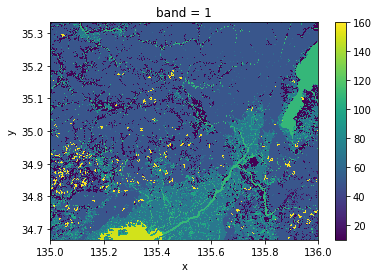

In [38]:
# easy to plot
da.plot()

In [40]:
# make my activity bounds and Select area data from tiff data
my_activity_bounds = polygon.bounds
my_area = da.sel(x=slice(my_activity_bounds[0], my_activity_bounds[2]), 
                 y=slice(my_activity_bounds[3], my_activity_bounds[1]))
my_area

<xarray.DataArray (band: 1, y: 97, x: 56)>
array([[[50, 50, ..., 50, 50],
        [50, 50, ..., 50, 50],
        ...,
        [70, 70, ..., 70, 70],
        [70, 70, ..., 70, 70]]], dtype=uint8)
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 35.07 35.07 35.06 35.06 ... 34.99 34.99 34.99 34.99
  * x        (x) float64 135.7 135.7 135.7 135.7 ... 135.8 135.8 135.8 135.8
Attributes:
    transform:               (0.00125, 0.0, 135.0, 0.0, -0.000833333333, 35.3...
    crs:                     +proj=longlat +a=6378137 +rf=298.257221999999 +t...
    res:                     (0.00125, 0.000833333333)
    is_tiled:                0
    nodatavals:              (nan,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_SOFTWARE:        Arc/Info
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

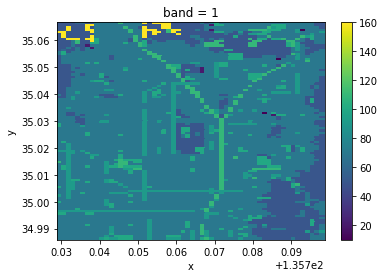

In [41]:
my_area.plot()

## Vector Data
- Data: KOKUDO SUCHI Joho: https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-v3_0.html#
- Administrative district Data: kyoto
- With geopandas

In [43]:
data = gpd.read_file('/content/drive/MyDrive/pyconjp2021/data/kokko_shape/N03-20210101_26_GML/N03-21_26_210101.shp')
data.head()

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,京都府,None,京都市,北区,26101,"POLYGON ((135.72539 35.17080, 135.72552 35.170..."
1,京都府,None,京都市,上京区,26102,"POLYGON ((135.75062 35.03822, 135.75079 35.038..."
2,京都府,None,京都市,左京区,26103,"POLYGON ((135.80481 35.31708, 135.80586 35.316..."
3,京都府,None,京都市,中京区,26104,"POLYGON ((135.73195 35.02251, 135.73195 35.022..."
4,京都府,None,京都市,東山区,26105,"POLYGON ((135.78466 35.01035, 135.78468 35.009..."


In [46]:
data.crs

<Geographic 2D CRS: EPSG:6668>
Name: JGD2011
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Japan - onshore and offshore.
- bounds: (122.38, 17.09, 157.65, 46.05)
Datum: Japanese Geodetic Datum 2011
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

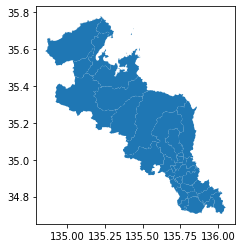

In [44]:
data.plot()

In [45]:
# plot with folium
center = shapely.geometry.MultiPolygon(data.geometry.values).centroid
map = folium.Map([center.y, center.x], zoom_start= 8)
folium.GeoJson(data, tooltip=folium.features.GeoJsonTooltip(fields=['N03_003', 'N03_004'])).add_to(map)
map

Output hidden; open in https://colab.research.google.com to view.

In [47]:
data1 = data.to_crs('EPSG:4326')

In [48]:
center = shapely.geometry.MultiPolygon(data1.geometry.values).centroid
map = folium.Map([center.y, center.x], zoom_start= 8)
folium.GeoJson(data1, tooltip=folium.features.GeoJsonTooltip(fields=['N03_003', 'N03_004'])).add_to(map)
map

Output hidden; open in https://colab.research.google.com to view.

In [54]:
# Select area where I was!!!

data1['me'] = data1.geometry.map(lambda x: x.intersects(polygon))
my_data = data1[data1['me'] == True]
my_data

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry,me
0,京都府,None,京都市,北区,26101,"POLYGON ((135.72539 35.17080, 135.72552 35.170...",True
1,京都府,None,京都市,上京区,26102,"POLYGON ((135.75062 35.03822, 135.75079 35.038...",True
2,京都府,None,京都市,左京区,26103,"POLYGON ((135.80481 35.31708, 135.80586 35.316...",True
3,京都府,None,京都市,中京区,26104,"POLYGON ((135.73195 35.02251, 135.73195 35.022...",True
4,京都府,None,京都市,東山区,26105,"POLYGON ((135.78466 35.01035, 135.78468 35.009...",True
5,京都府,None,京都市,下京区,26106,"POLYGON ((135.77017 35.00428, 135.77019 35.003...",True


In [55]:
center = shapely.geometry.MultiPolygon(my_data.geometry.values).centroid
map = folium.Map([center.y, center.x],
                 tiles='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
                 attr='google map'
                 )
folium.GeoJson(my_data, tooltip=folium.features.GeoJsonTooltip(fields=['N03_003', 'N03_004'])).add_to(map)
map